# Planning demo

This notebook introspects the sophisticated planning tree.

In [1]:
%load_ext autoreload
%autoreload 2

import sys

if ".." not in sys.path:
    sys.path.append("..")

import numpy as np
np.random.seed(1337)

## Environment

We setup a basic foraging environment.

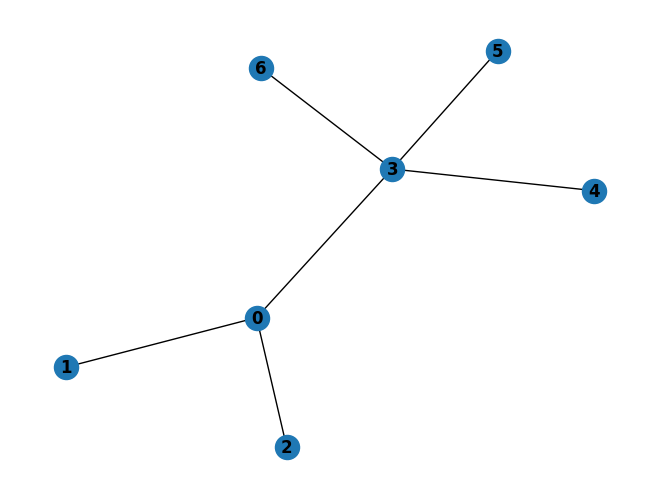

In [2]:
import util
import networkx as nx
from envs import GraphEnv

graph, metadata = util.generate_connected_clusters(3, 2)
nx.draw(graph, with_labels=True, font_weight="bold")

agent_config = {
        "Forager": 0,
    }
# define objects and their true locations
object_config = {"Food": 4}

# create environment
env = GraphEnv(graph, agent_config, object_config)

## Agents

Now we create a `ForageAgent`.

In [3]:
from agents import ForageAgent

agent = ForageAgent("Forager", env, [0], sophisticated=True, planning_horizon=2)

## Simulation

We run the simulation for 10 timesteps. The agent should forage for food and consume it, in order to get its energy levels up.

In [4]:
from experiment import tick

result = {a: [] for a in agent_config.keys()}

# simulate T timesteps
T = 10
for t in range(T):
    info = tick(agent, env)
    for a, info in info.items():
        result[a].append(info)

Forager moved to location 1
Forager moved to location 0
Forager moved to location 3
Forager moved to location 6
Forager moved to location 3
Forager moved to location 5
Forager moved to location 3
Forager moved to location 4 and observed object
Object consumed, respawned at location  2
Forager eats
Forager moved to location 3


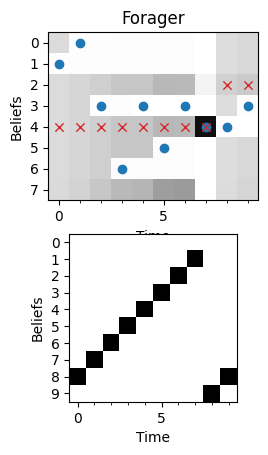

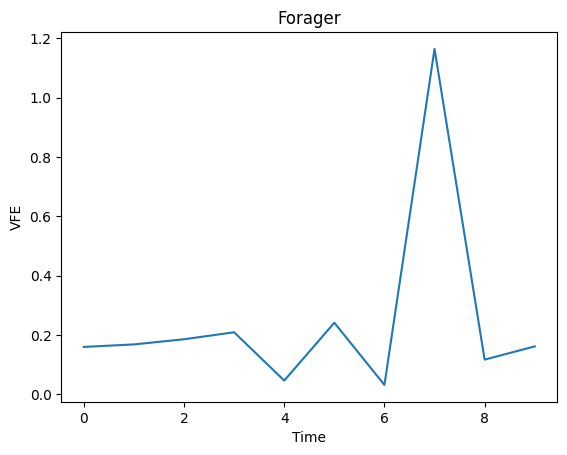

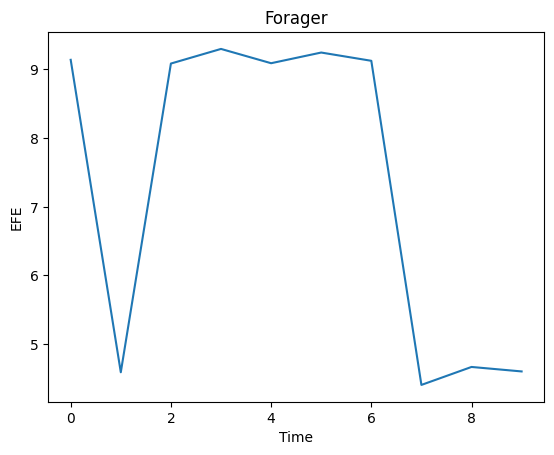

In [5]:
from visualize import *

plot_beliefs(result)
plot_vfe(result)
plot_efe(result)

# Planning tree

Now we can inspect the planning tree of the agent at each timestep

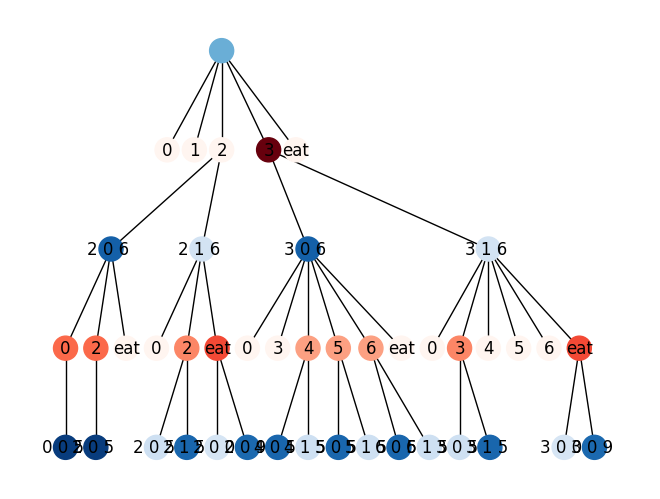

In [7]:
timestep = 2
plan_tree = result["Forager"][timestep]["tree"]


def policy_label(node):
    policy = node["policy"]
    if policy[0][1] == 1:
        return "eat"
    elif policy[0][1] == 2:
        return "pick"
    elif policy[0][2] == 3:
        return "drop"
    else:
        return str(policy[0][0])

def observation_label(node):
    observation = node["observation"]
    res = ""
    for i, o in enumerate(observation):
        res += str(np.argmax(o)) + " "
    return res

plot_plan_tree(plan_tree, policy_label, observation_label)

Note that, once the agent is certain on which policy to pick, it won't expand the three further. For instance, when it found the object, it's pretty clear it should eat.

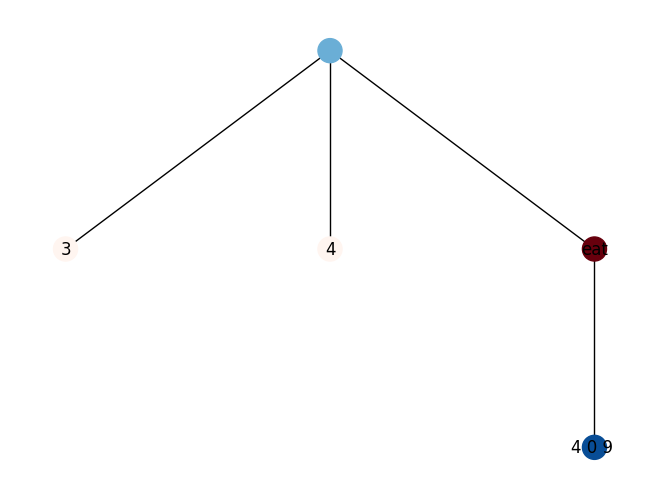

In [10]:
timestep = 8
plan_tree = result["Forager"][timestep]["tree"]
plot_plan_tree(plan_tree, policy_label, observation_label)